In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV


# Exploratory Data Analysis

1. Check missing values
2. Print data summaries
3. Data visualization
    * Categorical data distribution
    * Numerical data distribution
    * Correlation Analysis

In [ ]:
# read data
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
# preview data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# check missing values
print("Missing Values:\n", df.isnull().sum()) # no missing values found

Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# check data summaries
print("\nNumerical Summary:\n", df.describe())


Numerical Summary:
                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [ ]:
# check & remove duplicate values
print("Count:", str(df.duplicated().sum()))
df = df.drop_duplicates()
print("Removed count:", str(df.duplicated().sum()))

# Check count of 'Other' in gender column before removal
other_count = (df['gender'] == 'Other').sum()
print("Count of 'Other' in gender before removal:", other_count)

# Remove rows where gender is 'other'
df = df[df['gender'] != 'Other']


Count: 3854
Removed count: 0
Count of 'Other' in gender before removal: 18


In [ ]:
# # Check count of 'Other' in gender column before removal
# no_info_count = (df['smoking_history'] == 'No Info').sum()
# print("Count of 'Other' in gender before removal:", no_info_count)

# # Remove rows where gender is 'other'
# df = df[df['smoking_history'] != 'No Info']

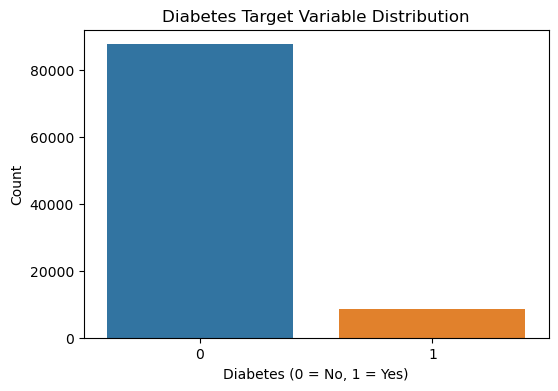

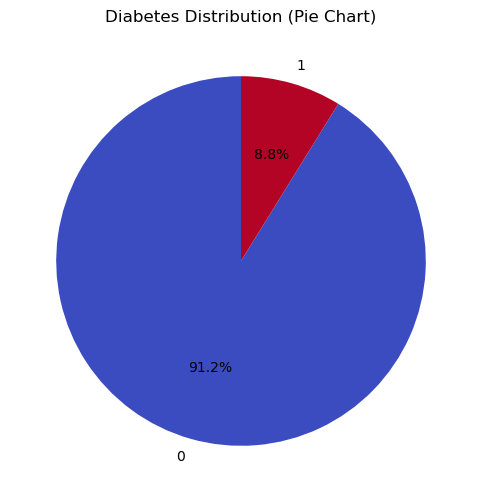

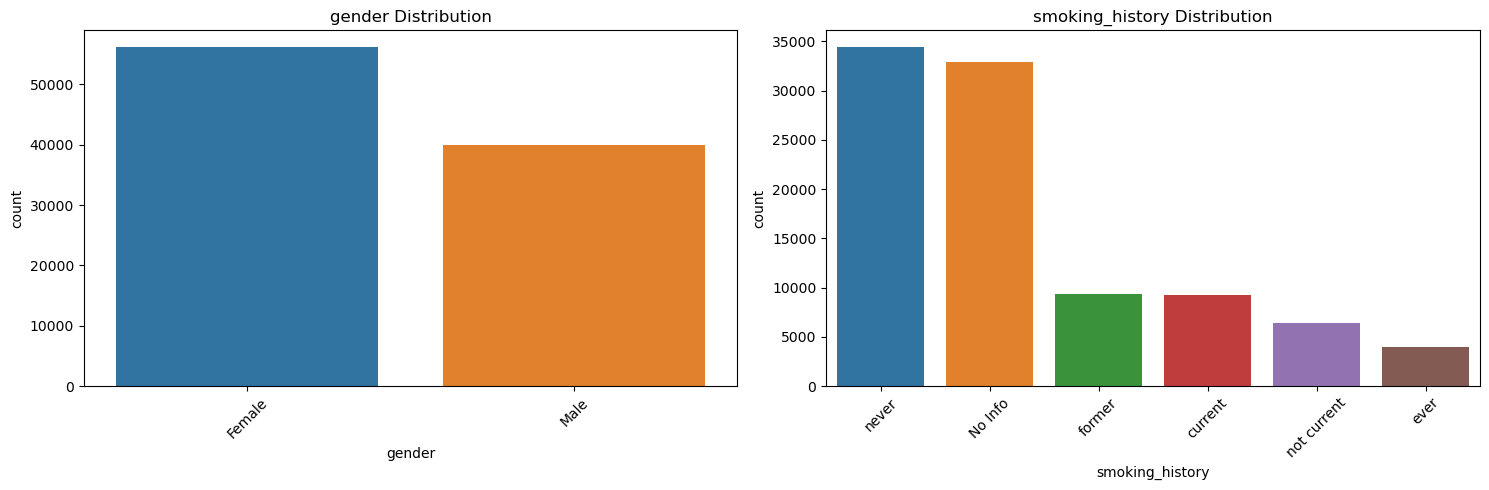

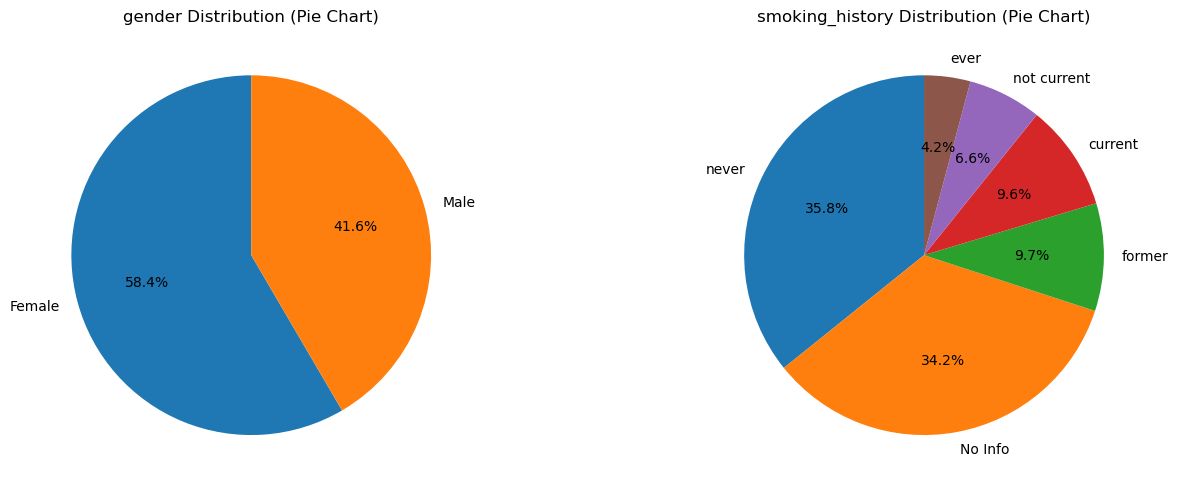

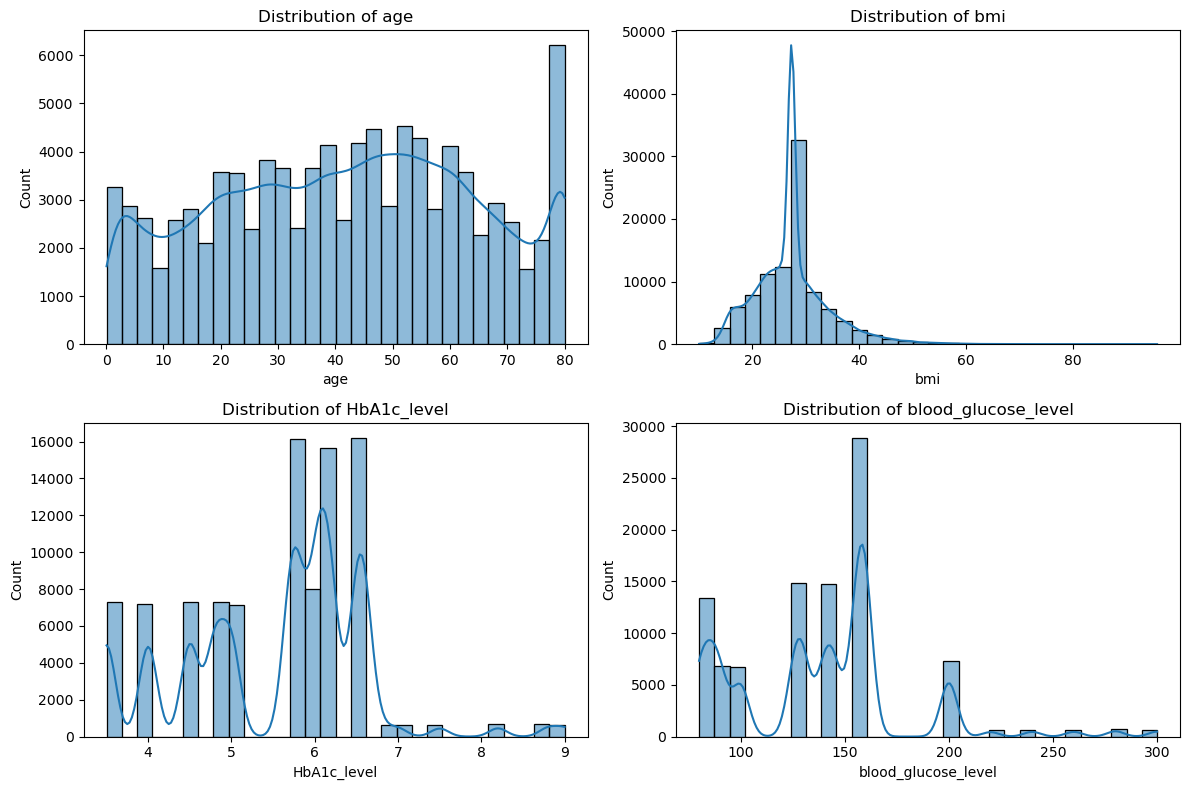

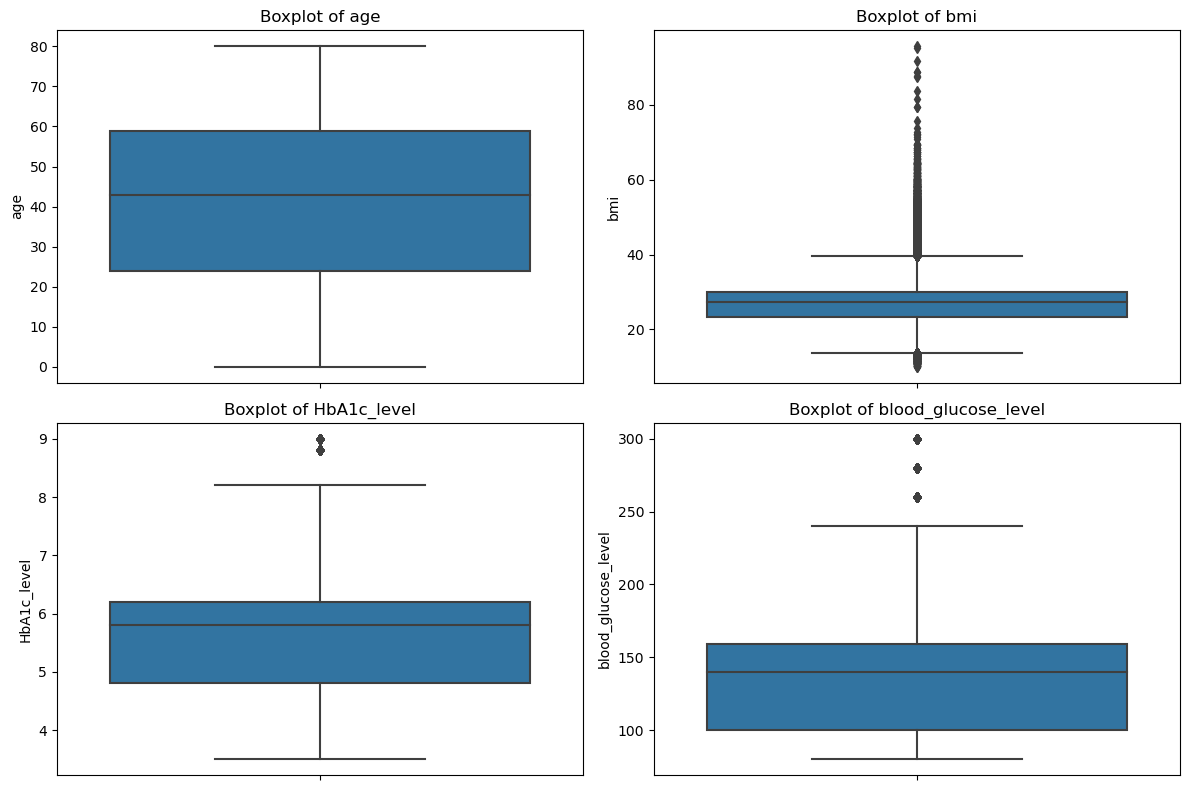

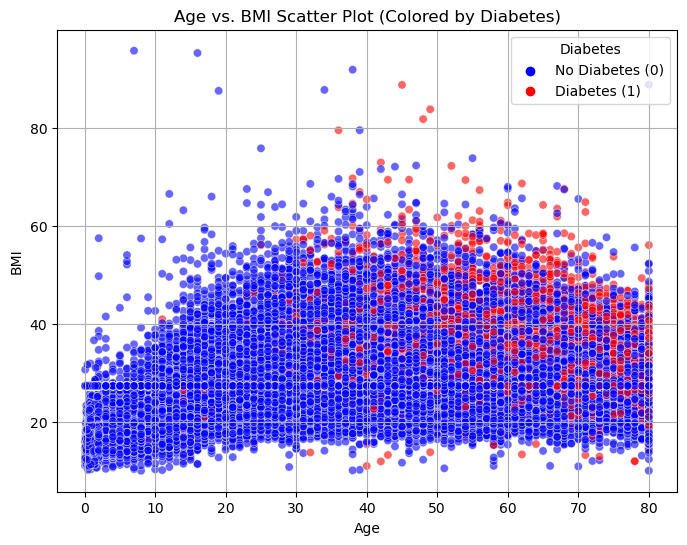

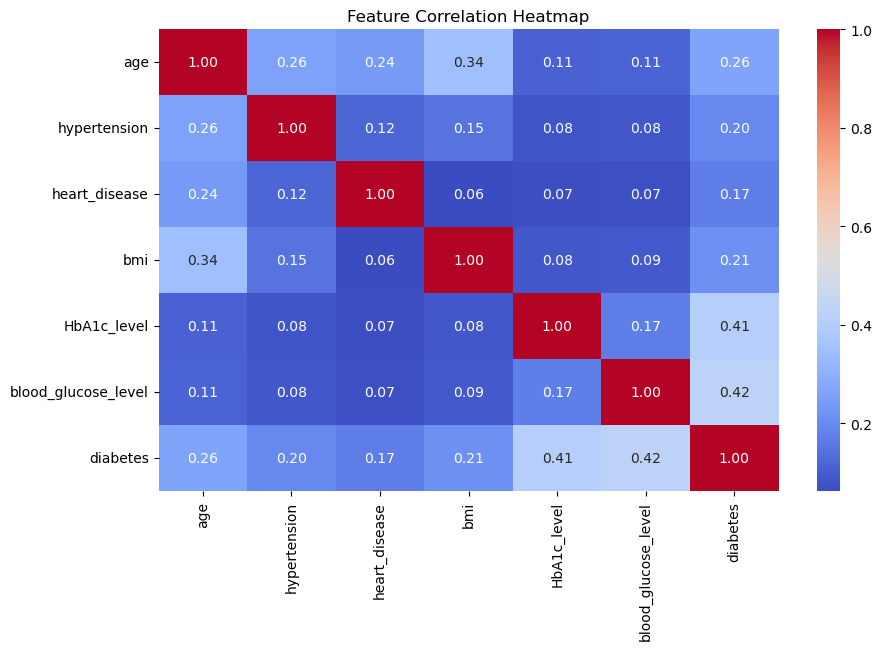

In [ ]:
# Visualizing the target variable (diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes')
plt.title("Diabetes Target Variable Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Pie chart for diabetes distribution
plt.figure(figsize=(6, 6))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Diabetes Distribution (Pie Chart)")
plt.ylabel('')
plt.show()

# Visualizing categorical variables with countplots and pie charts
categorical_cols = ['gender', 'smoking_history']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pie charts for categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} Distribution (Pie Chart)")
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Visualizing numerical variables with histograms and KDE
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Age vs. BMI, colored by Diabetes status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Titles and labels
plt.title("Age vs. BMI Scatter Plot (Colored by Diabetes)")
plt.xlabel("Age")
plt.ylabel("BMI")

# Legend customization
legend_labels = {0: "No Diabetes (0)", 1: "Diabetes (1)"}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[int(label)] for label in labels], title="Diabetes")

# Grid and display
plt.grid()
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature Engineering
1. Created BMI categories and Age groups
2. Freated possible interactio features (Hypertension x Heart Disease)
3. Created Polynomial Features (BMI and HbA1c_level)

In [ ]:
# feature engineering

# 1. Create BMI Categories (Underweight, Normal, Overweight, Obese)
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# One-hot encode BMI categories
df = pd.get_dummies(df, columns=['bmi_category'], drop_first=True)

# 2. Generate Age Groups (Young: <30, Middle-Aged: 30-60, Senior: >60)
df['age_group'] = pd.cut(
    df['age'],
    bins=[-float('inf'), 30, 60, float('inf')],
    labels=['Young', 'Middle-Aged', 'Senior']
)

# One-hot encode Age Groups
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

#3. Create Interaction Features (Hypertension x Heart Disease) * both issues may get higher risk
df['hypertension_heart_disease'] = df['hypertension'] * df['heart_disease']

#4. Create Polynomial Features (e.g., Squaring HbA1c_level and BMI) * higher bmi and HbA1c_level may generate higher risks
df['bmi_squared'] = df['bmi'] ** 2
df['HbA1c_level_squared'] = df['HbA1c_level'] ** 2
df['blood_glucose_level_squared'] = df['blood_glucose_level'] ** 2

# Feature Preprocessing
1. Handle missing values
2. Encode categorical variables
3. Manage Outliers (if necessary, can always remove)

In [ ]:
# data preprocessing

# Convert target variable to integer labels (if necessary)
y = df['diabetes']

# Check unique values in the target variable
print("Unique values in target (y):", y.unique())

# Ensure it's binary (0 and 1)
if y.dtypes != 'int64' and y.dtypes != 'int32':
    y = y.astype(int)  # Convert to integer if it's float or object

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Handle missing values using SimpleImputer
num_imputer = SimpleImputer(strategy="median")  # Fill numerical with median
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")  # Fill categorical with mode
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male=1, Female=0

#Based on smoking , mapping to a value
smoking_history_map = {
    'never': 0,          # Non-Smoker
    'not current': 1,    # Former Smoker
    'former': 1,         # Former Smoker
    'current': 2,        # Smoker
    'ever': 1,           # Former Smoker
    'No Info': -1        # Unknown
}
df['smoking_history'] = df['smoking_history'].map(smoking_history_map)

# Convert ALL boolean columns to integers (0/1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create an outlier flag column
    df[f"{column}_outlier"] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
    # Cap values at the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
# List of numerical columns to cap outliers- we do it by capping and creating a feature marking that the datapoint is an outlier
outlier_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# Apply capping and create outlier indicator features
for col in outlier_cols:
    df = cap_outliers(df, col)


columns_to_drop = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display final dataset structure
print("Feature Engineering & Preprocessing Completed. Sample Data:")
print(df.head())


Unique values in target (y): [0 1]
Feature Engineering & Preprocessing Completed. Sample Data:
   gender  hypertension  heart_disease  smoking_history  diabetes  \
0       0           0.0            1.0                0       0.0   
1       0           0.0            0.0               -1       0.0   
2       1           0.0            0.0                0       0.0   
3       0           0.0            0.0                2       0.0   
4       1           1.0            1.0                2       0.0   

   bmi_category_Normal  bmi_category_Overweight  bmi_category_Obese  \
0                  0.0                      1.0                 0.0   
1                  0.0                      1.0                 0.0   
2                  0.0                      1.0                 0.0   
3                  1.0                      0.0                 0.0   
4                  1.0                      0.0                 0.0   

   age_group_Middle-Aged  age_group_Senior  hypertension_heart_

In [ ]:
df_diabetes = df[df['diabetes'] == 1]
df_non_diabetes = df[df['diabetes'] == 0]

# Randomly sample 1000 non-diabetes cases
df_non_diabetes_sampled = df_non_diabetes.sample(n=1000, random_state=42)

# Combine diabetes and sampled non-diabetes cases
df_balanced = pd.concat([df_diabetes, df_non_diabetes_sampled])

# Shuffle the dataset to mix both classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting dataset into train and test sets
X = df_balanced.drop(columns=['diabetes'])
y = df_balanced['diabetes']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Model Selection

In [ ]:
# Balance the dataset
df_diabetes = df[df['diabetes'] == 1]
df_non_diabetes = df[df['diabetes'] == 0]
df_non_diabetes_sampled = df_non_diabetes.sample(n=15000, random_state=42)
df_balanced = pd.concat([df_diabetes, df_non_diabetes_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Preprocess the data
X = pd.get_dummies(df_balanced.drop(columns=['diabetes']), drop_first=True)
y = df_balanced['diabetes']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42, stratify=y)

# Models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Storing results
results = {}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    }

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:\n", results_df)

Model Performance Comparison:
                      Accuracy  Precision    Recall       AUC
Logistic Regression  0.886604   0.871851  0.804311  0.956824
Random Forest        0.898163   0.869114  0.845402  0.965958


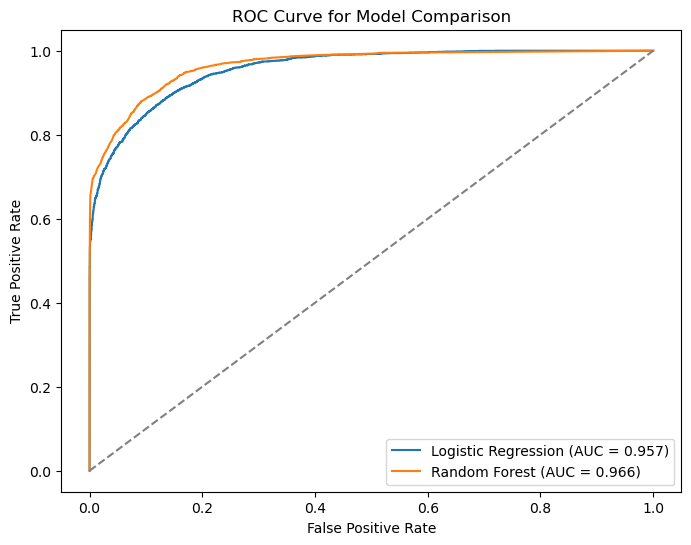

Best Model: Random Forest based on AUC score


In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Comparison")
plt.legend()
plt.show()

# Selecting the best model based on AUC score
best_model = max(results, key=lambda k: results[k]["AUC"] if results[k]["AUC"] is not None else 0)
print(f"Best Model: {best_model} based on AUC score")

# A Test on Random Forest - Goal: Tune the model and try to increase recall
1. hyperparameter tuning via CV
2. Ajudst Threshold

In [ ]:
# Part of the code here we use copilot

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define a small hyperparameter grid to reduce memory usage
param_grid_rf_light = {
    'n_estimators': [50, 100, 400],  # Fewer trees for efficiency
    'max_depth': [5, 10, 20],  # Control tree depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Only two values to test
    'min_samples_leaf': [1, 2, 5],  # Keep small values
    'max_features': ['sqrt'],  # Reduce number of features at each split
}

# Initialize Random Forest with balanced class weights
rf_light = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform lightweight Randomized Search
random_search_rf_light = RandomizedSearchCV(
    rf_light,
    param_distributions=param_grid_rf_light,
    n_iter=7,  # Only 7 combinations to limit computation
    scoring='recall',  # Optimize for recall
    cv=7,  # 7-fold CV to reduce memory usage
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_rf_light.fit(X_train, y_train)

# Get the best model
best_rf_light = random_search_rf_light.best_estimator_
print("Best Random Forest Parameters (Light Tuning):", random_search_rf_light.best_params_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
Best Random Forest Parameters (Light Tuning): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


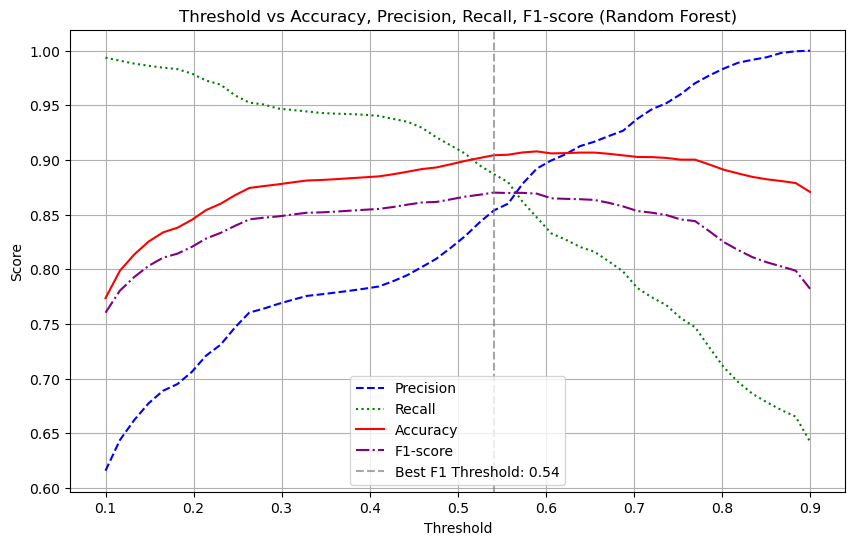

In [ ]:
# Part of the code here we use copilot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Get predicted probabilities from the best tuned Random Forest model
y_prob_rf_light = best_rf_light.predict_proba(X_test)[:, 1]

# Generate multiple threshold values
thresholds = np.linspace(0.1, 0.9, 50)

# Store performance metrics for each threshold
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob_rf_light >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot Threshold vs Performance Metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall_scores, label="Recall", linestyle=":", color="green")
plt.plot(thresholds, accuracy_scores, label="Accuracy", linestyle="-", color="red")
plt.plot(thresholds, f1_scores, label="F1-score", linestyle="-.", color="purple")

# Highlight optimal threshold point
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
plt.axvline(best_threshold, color="gray", linestyle="dashed", alpha=0.7, label=f"Best F1 Threshold: {best_threshold:.2f}")

# Formatting
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Accuracy, Precision, Recall, F1-score (Random Forest)")
plt.legend()
plt.grid()
plt.show()

Tuned Random Forest (Light) Performance:
Accuracy: 0.9039
Precision: 0.8527
Recall: 0.8872  (↑ Should improve recall!)
AUC: 0.9724
F1: 0.8696


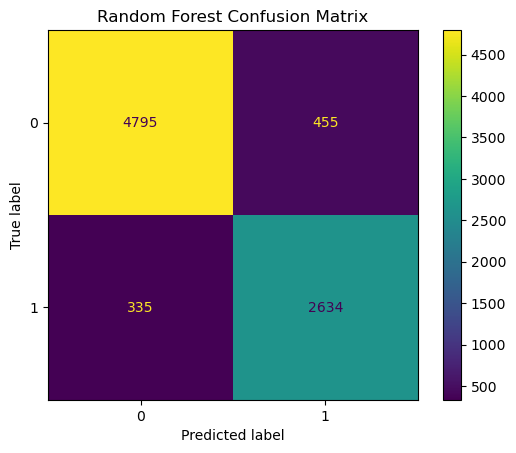

In [ ]:

from sklearn.metrics import recall_score, precision_score, roc_auc_score

# Predict probabilities using best model
y_prob_rf_light = best_rf_light.predict_proba(X_test)[:, 1]

# Adjust the threshold for higher recall
threshold = 0.54  # Try 0.2 - 0.4 for best results
y_pred_rf_light = (y_prob_rf_light > threshold).astype(int)

# Compute metrics
best_recall_rf_light = recall_score(y_test, y_pred_rf_light)
best_precision_rf_light = precision_score(y_test, y_pred_rf_light)
best_auc_rf_light = roc_auc_score(y_test, y_prob_rf_light)
best_accuracy_rf_light = accuracy_score(y_test, y_pred_rf_light)
best_f1_rf_light = f1_score(y_test, y_pred_rf_light)

print(f"Tuned Random Forest (Light) Performance:\n"
      f"Accuracy: {best_accuracy_rf_light:.4f}\n"
      f"Precision: {best_precision_rf_light:.4f}\n"
      f"Recall: {best_recall_rf_light:.4f}  (↑ Should improve recall!)\n"
      f"AUC: {best_auc_rf_light:.4f}\n"
      f"F1: {best_f1_rf_light:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf_light)
ConfusionMatrixDisplay(rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

Note: Recall is still low
**Try**: lower the threshold

## Test on LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Optimization solvers
    'max_iter': [100, 200, 500]  # Maximum iterations for convergence
}

# Initialize Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)

# Perform Randomized Search CV
random_search_lr = RandomizedSearchCV(
    lr,
    param_distributions=param_grid_lr,
    n_iter=7,  # Number of combinations to test
    scoring='recall',  # Optimize for recall
    cv=7,  # 7-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the Logistic Regression model
random_search_lr.fit(X_train, y_train)

# Get the best model
best_lr = random_search_lr.best_estimator_
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
Best Logistic Regression Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 1}


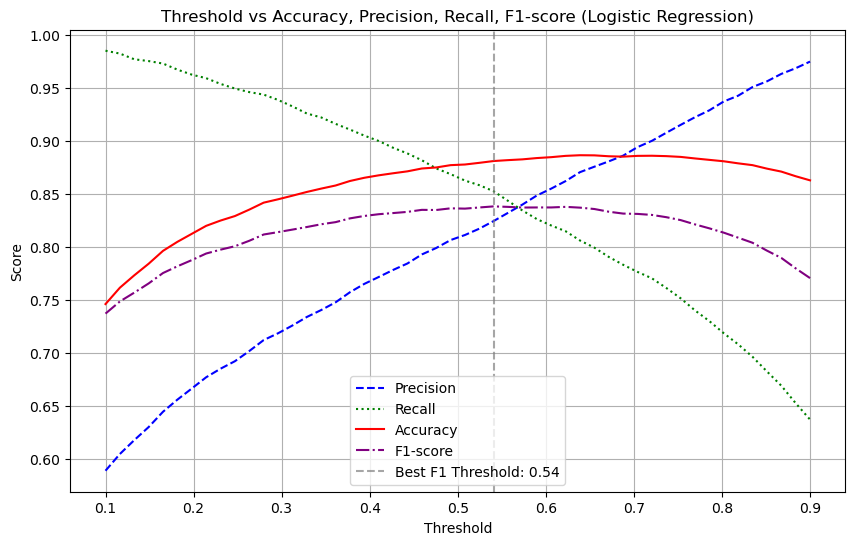

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Get predicted probabilities from the best Logistic Regression model
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

# Generate multiple thresholds
thresholds = np.linspace(0.1, 0.9, 50)

# Store performance metrics for each threshold
precision_scores_lr = []
recall_scores_lr = []
accuracy_scores_lr = []
f1_scores_lr = []

for threshold in thresholds:
    y_pred = (y_prob_lr >= threshold).astype(int)

    # Compute metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores
    precision_scores_lr.append(precision)
    recall_scores_lr.append(recall)
    accuracy_scores_lr.append(accuracy)
    f1_scores_lr.append(f1)

# Plot Threshold vs Performance Metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores_lr, label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall_scores_lr, label="Recall", linestyle=":", color="green")
plt.plot(thresholds, accuracy_scores_lr, label="Accuracy", linestyle="-", color="red")
plt.plot(thresholds, f1_scores_lr, label="F1-score", linestyle="-.", color="purple")

# Highlight optimal threshold point
best_f1_idx = np.argmax(f1_scores_lr)
best_threshold = thresholds[best_f1_idx]
plt.axvline(best_threshold, color="gray", linestyle="dashed", alpha=0.7, label=f"Best F1 Threshold: {best_threshold:.2f}")

# Formatting
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Accuracy, Precision, Recall, F1-score (Logistic Regression)")
plt.legend()
plt.grid()
plt.show()

Tuned Logistic Regression Performance:
Accuracy: 0.8811
Precision: 0.8240
Recall: 0.8531  (↑ Optimized!)
F1-score: 0.8383
AUC: 0.9568


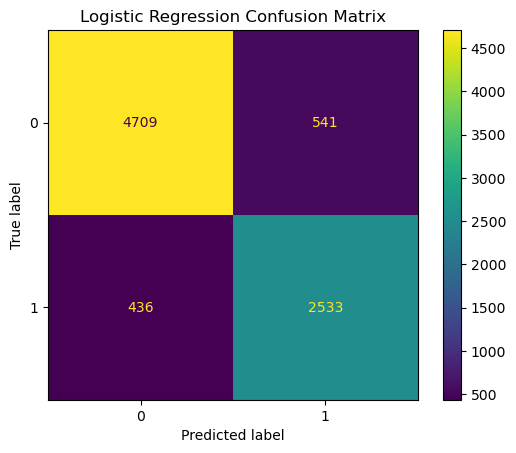

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

# Adjust threshold for better recall
threshold = 0.54  # Try values between 0.2 - 0.4
y_pred_lr = (y_prob_lr > threshold).astype(int)

# Compute metrics
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_prob_lr)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Print results
print(f"Tuned Logistic Regression Performance:\n"
      f"Accuracy: {lr_accuracy:.4f}\n"
      f"Precision: {lr_precision:.4f}\n"
      f"Recall: {lr_recall:.4f}  (↑ Optimized!)\n"
      f"F1-score: {lr_f1:.4f}\n"
      f"AUC: {lr_auc:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(lr_cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# -----

# Feature Importance Analysis

## Feature Importance analysis for Logistic Regression

In [ ]:
# best_lr was your tuned logistic regression model from the code above.
coefficients = best_lr.coef_[0]

# Match coefficients with the corresponding feature names
feature_names = X.columns  # This is the set of features you used for training
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (Log-Odds)': coefficients,
    'Odds Ratio': np.exp(coefficients)  # exponentiate to get the odds ratio
})

# Sort by the absolute value of coefficient (important for interpretability)
importance_df['Abs_Coefficient'] = importance_df['Coefficient (Log-Odds)'].abs()
importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Display the top rows
importance_df.head(10)


,Feature,Coefficient (Log-Odds),Odds Ratio,Abs_Coefficient
11,HbA1c_level_squared,2.748228,15.614944,2.748228
12,blood_glucose_level_squared,1.704943,5.501072,1.704943
8,age_group_Senior,1.285713,3.617245,1.285713
16,blood_glucose_level_outlier,1.207402,3.344783,1.207402
7,age_group_Middle-Aged,0.791118,2.205861,0.791118
6,bmi_category_Obese,0.579511,1.785166,0.579511
5,bmi_category_Overweight,0.387053,1.472635,0.387053
15,HbA1c_level_outlier,0.342743,1.408807,0.342743
1,hypertension,0.312742,1.367169,0.312742
10,bmi_squared,0.305315,1.357053,0.305315


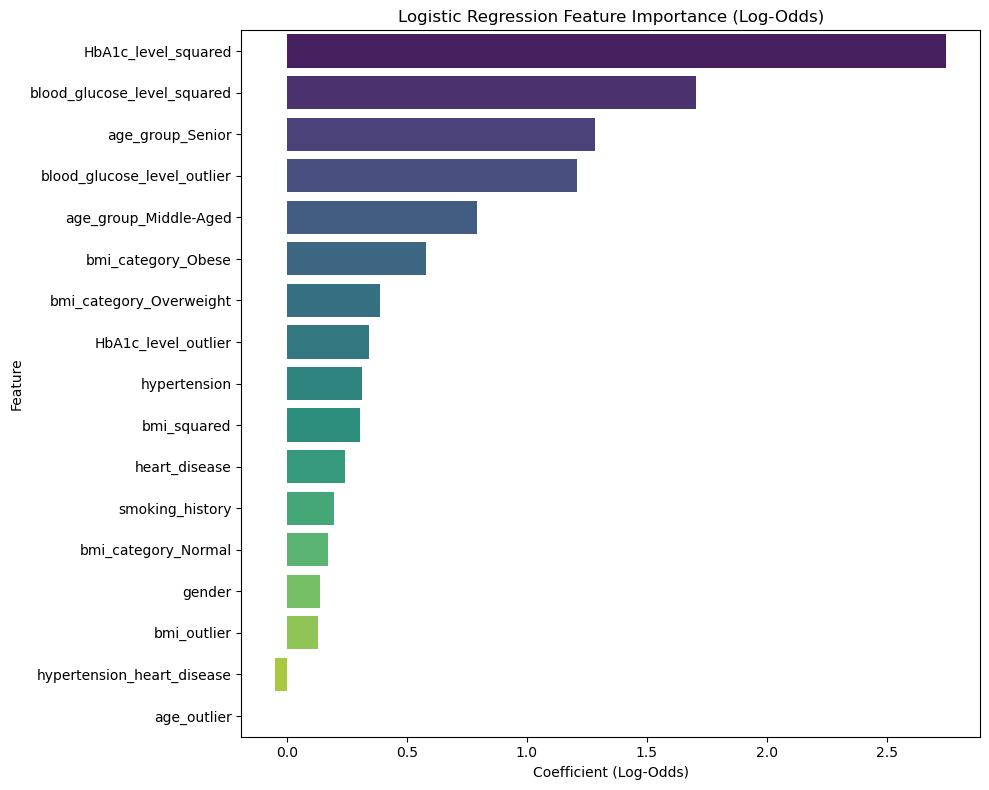

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient (Log-Odds)',
    y='Feature',
    data=importance_df,
    palette='viridis'
)
plt.title("Logistic Regression Feature Importance (Log-Odds)")
plt.tight_layout()
plt.show()


## Discussion

In [ ]:
# OpenAI. (2025, February 10). Conversation with ChatGPT about formate code.
# ChatGPT. Retrieved from https://chatgpt.com/share/67afbc27-ddb0-8013-80c1-0f576f328bee


# -----------------------------
# FEATURE ENGINEERING & PREPROCESSING (Without BMI & Age Grouping)
# -----------------------------

# Read dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# -----------------------------
# 1) Handle Missing Values
# -----------------------------

# Check missing values
print("Missing Values:\n", df.isnull().sum())  # No missing values found

# -----------------------------
# 2) Remove Duplicates & Clean Categorical Data
# -----------------------------

# Remove duplicate rows
df = df.drop_duplicates()

# Remove "Other" category in gender
df = df[df['gender'] != 'Other']

# Map gender to binary values (Male = 1, Female = 0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encode smoking history as an ordinal variable
smoking_history_map = {
    'never': 0,          # Non-Smoker
    'not current': 1,    # Former Smoker
    'former': 1,         # Former Smoker
    'current': 2,        # Smoker
    'ever': 1,           # Former Smoker
    'No Info': -1        # Unknown
}
df['smoking_history'] = df['smoking_history'].map(smoking_history_map)

# -----------------------------
# 3) Create Interaction & Polynomial Features
# -----------------------------

# Interaction Feature: Hypertension x Heart Disease
df['hypertension_heart_disease'] = df['hypertension'] * df['heart_disease']

# Polynomial Features
df['HbA1c_level_squared'] = df['HbA1c_level'] ** 2
df['blood_glucose_level_squared'] = df['blood_glucose_level'] ** 2

# -----------------------------
# 4) Handle Outliers (Cap Using IQR)
# -----------------------------

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create an outlier flag column
    df[f"{column}_outlier"] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
    # Cap values at the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# List of numerical columns to cap outliers
outlier_cols = ['HbA1c_level', 'blood_glucose_level']

# Apply capping and create outlier indicator features
for col in outlier_cols:
    df = cap_outliers(df, col)

# -----------------------------
# 5) FINALIZE FEATURES (KEEP AGE & BMI AS CONTINUOUS VARIABLES)
# -----------------------------

# Drop unnecessary squared features (as requested)
columns_to_drop = ['HbA1c_level_squared', 'blood_glucose_level_squared']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Print final dataset structure
print("Feature Engineering & Preprocessing Completed. Sample Data:")
print(df.head())



Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Feature Engineering & Preprocessing Completed. Sample Data:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                0  25.19   
1       0  54.0             0              0               -1  27.32   
2       1  28.0             0              0                0  27.32   
3       0  36.0             0              0                2  23.45   
4       1  76.0             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes  hypertension_heart_disease  \
0          6.6                140.0         0                           0   
1          6.6                 80.0         0                           0   
2          5.7       

### logistic regresssion


Final Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'diabetes', 'hypertension_heart_disease']
Sample Data after feature engineering & dropping BG/HbA1c:
    gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                0  25.19   
1       0  54.0             0              0               -1  27.32   
2       1  28.0             0              0                0  27.32   
3       0  36.0             0              0                2  23.45   
4       1  76.0             1              1                2  20.14   

   diabetes  hypertension_heart_disease  
0         0                           0  
1         0                           0  
2         0                           0  
3         0                           0  
4         0                           1  

Model Performance Comparison (Balanced Data, No HbA1c / Glucose):
                     Accuracy  Precision    Recall   

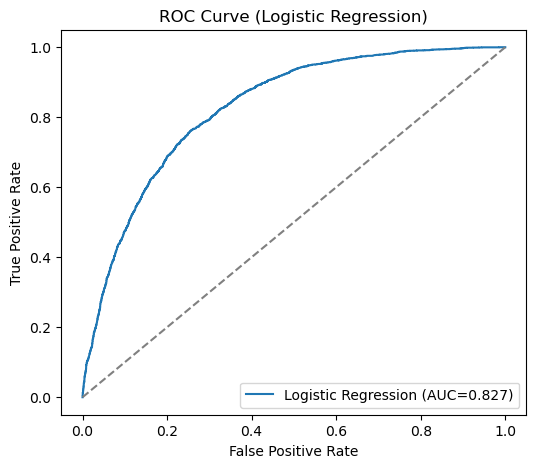

In [ ]:
# OpenAI. (2025, February 10). Conversation with ChatGPT about grop and formate code.
# ChatGPT. Retrieved from https://chatgpt.com/share/67afbc27-ddb0-8013-80c1-0f576f328bee


# Remove unwanted columns
columns_to_remove = [
    'HbA1c_level', 'blood_glucose_level',
    'HbA1c_level_squared', 'blood_glucose_level_squared',
    'HbA1c_level_outlier', 'blood_glucose_level_outlier'
]
existing_cols = [col for col in columns_to_remove if col in df.columns]
df.drop(columns=existing_cols, axis=1, inplace=True)

# Double-check the dataset
print("\nFinal Columns:", df.columns.tolist())
print("Sample Data after feature engineering & dropping BG/HbA1c:\n", df.head())

# -----------------------------
# 3) PREPARE DATA FOR MODELING (WITH BALANCED DATA)
# -----------------------------
# Splitting diabetes and non-diabetes cases
df_diabetes = df[df['diabetes'] == 1]
df_non_diabetes = df[df['diabetes'] == 0]

# Randomly sample 1000 non-diabetes cases
df_non_diabetes_sampled = df_non_diabetes.sample(n=15000, random_state=42)

# Combine diabetes and sampled non-diabetes cases
df_balanced = pd.concat([df_diabetes, df_non_diabetes_sampled])

# Shuffle the dataset to mix both classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Define X and y
X = df_balanced.drop(columns=['diabetes'])
y = df_balanced['diabetes']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4) TRAIN/TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.35, random_state=42, stratify=y
)

# -----------------------------
# 5) TRAIN MODELS & GET PROBABILITIES
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
y_probs = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Generate predictions & probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store probabilities for later analysis
    y_probs[name] = y_prob

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc_ = roc_auc_score(y_test, y_prob)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'AUC': auc_
    }

# Show final performance comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison (Balanced Data, No HbA1c / Glucose):")
print(results_df)

# -----------------------------
# 6) OBTAIN PREDICTED PROBABILITIES
# -----------------------------
print("\nExample: Predicted probabilities from Logistic Regression on X_test:")
y_prob_lr = y_probs["Logistic Regression"]
print("First 10 probabilities:", y_prob_lr[:10])

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr):.3f})")
plt.plot([0,1],[0,1],"--", color='grey')
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


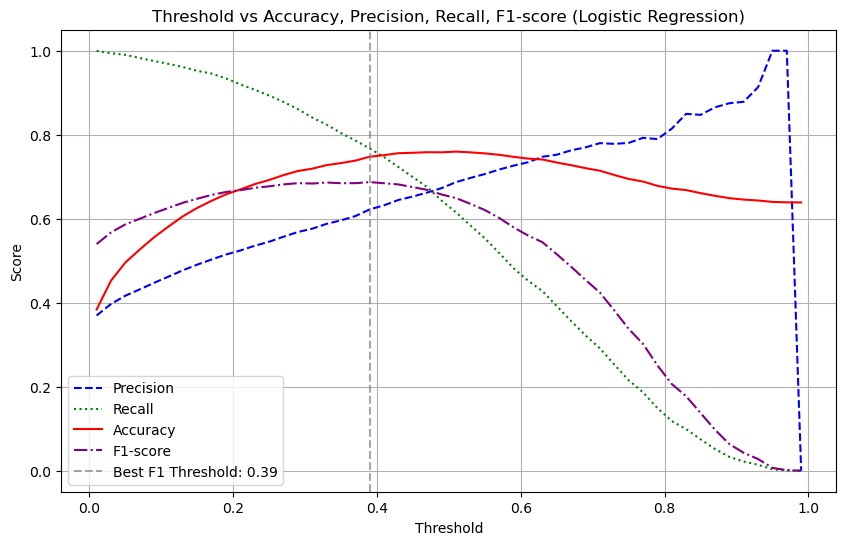

In [ ]:

# -----------------------------
# 7) TRADE-OFF ANALYSIS BETWEEN PRECISION, RECALL, ACCURACY, AND F1-SCORE
# -----------------------------
# Generate multiple thresholds
thresholds = np.linspace(0.01, 0.99, 50)

# Store performance metrics
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob_lr >= threshold).astype(int)

    # Compute metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)


# Plot Trade-Off Curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall_scores, label="Recall", linestyle=":", color="green")
plt.plot(thresholds, accuracy_scores, label="Accuracy", linestyle="-", color="red")
plt.plot(thresholds, f1_scores, label="F1-score", linestyle="-.", color="purple")

# Highlight optimal threshold (best F1-score)
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
plt.axvline(best_threshold, color="gray", linestyle="dashed", alpha=0.7, label=f"Best F1 Threshold: {best_threshold:.2f}")

# Formatting
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Accuracy, Precision, Recall, F1-score (Logistic Regression)")
plt.legend()
plt.grid()
plt.show()


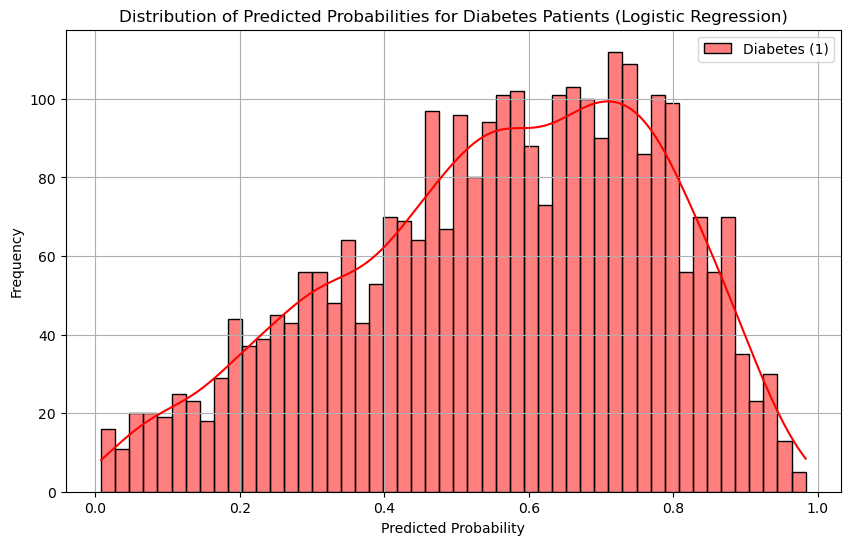

In [ ]:
# -----------------------------
# 8) VISUALIZE DISTRIBUTION OF PREDICTED PROBABILITIES (ONLY DIABETES)
# -----------------------------
plt.figure(figsize=(10, 6))

sns.histplot(y_prob_lr[y_test == 1], bins=50, kde=True, color="red", label="Diabetes (1)")

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities for Diabetes Patients (Logistic Regression)")
plt.legend()
plt.grid()
plt.show()


### random forest

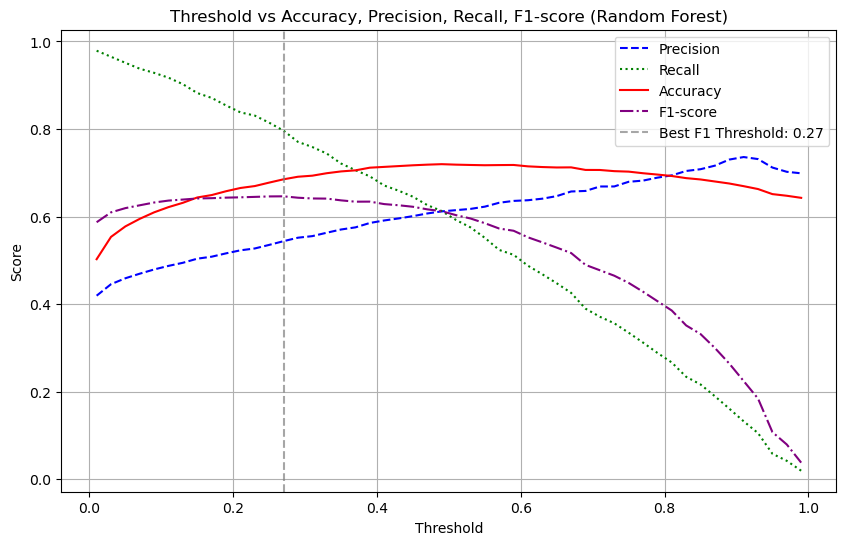

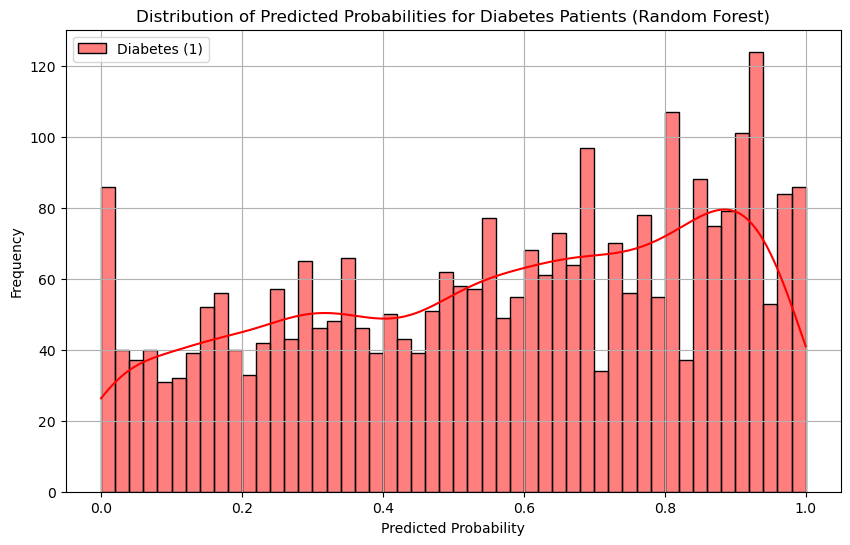

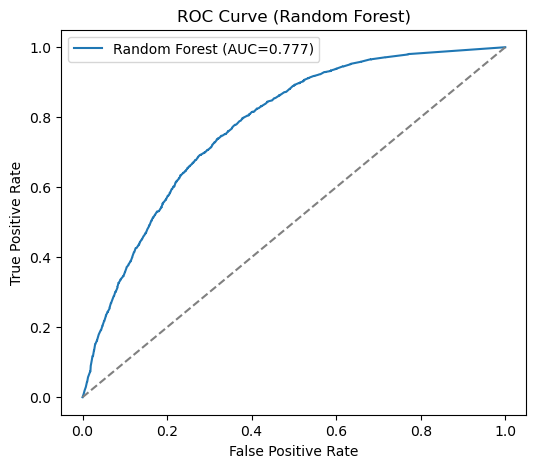

0.27

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve

# Extract predicted probabilities for Random Forest
y_prob_rf = y_probs["Random Forest"]

# -----------------------------
# 1) TRADE-OFF ANALYSIS BETWEEN PRECISION, RECALL, ACCURACY, AND F1-SCORE (Random Forest)
# -----------------------------

# Generate multiple thresholds
thresholds = np.linspace(0.01, 0.99, 50)

# Store performance metrics
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob_rf >= threshold).astype(int)

    # Compute metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Plot Trade-Off Curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall_scores, label="Recall", linestyle=":", color="green")
plt.plot(thresholds, accuracy_scores, label="Accuracy", linestyle="-", color="red")
plt.plot(thresholds, f1_scores, label="F1-score", linestyle="-.", color="purple")

# Highlight optimal threshold (best F1-score)
best_f1_idx = np.argmax(f1_scores)
best_threshold_rf = thresholds[best_f1_idx]
plt.axvline(best_threshold_rf, color="gray", linestyle="dashed", alpha=0.7, label=f"Best F1 Threshold: {best_threshold_rf:.2f}")

# Formatting
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Accuracy, Precision, Recall, F1-score (Random Forest)")
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 2) VISUALIZE DISTRIBUTION OF PREDICTED PROBABILITIES (ONLY DIABETES) - Random Forest
# -----------------------------
plt.figure(figsize=(10, 6))

sns.histplot(y_prob_rf[y_test == 1], bins=50, kde=True, color="red", label="Diabetes (1)")

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities for Diabetes Patients (Random Forest)")
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 3) ROC Curve for Random Forest
# -----------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0,1], [0,1], "--", color='grey')
plt.title("ROC Curve (Random Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Return best threshold for Random Forest
best_threshold_rf
